#  Homework 1
## k-NN Regression, Linear Regression, and Multilinear Regression

**Summer 2019**<br/>
**Instructor**: Pavlos Protopapas
**Homework prepared by:** David Sondak and Andrea Porelli

---

### INSTRUCTIONS

- Submisson instructions:
  - Submit your Jupyter notebook to the teaching staff in an email.
  - The email should have the following subject:  gec-summer-2019 HW 1 "Your Name"
    - e.g. gec-summer2019 HW1 David Sondak
    
    **Homeworks with the wrong subject line will recieve a 0.**
  - The due date is **Friday, August 2nd at 11:59 PM EDT**.  Please note the time-zone! (EDT stands for Eastern Daylight Time).
    **No late days!**

- **Restart the kernel and run the whole notebook again before you submit.**

#### Suggestion
Before starting your homework, you may want to consider making a copy of the problem statement.  For example, you can copy `hw1.ipynb` to `hw1_working.ipynb` and then do all of your work in `hw1_working.ipynb`.  When you're ready to submit, make another copy (maybe call it `hw1_final_Group#.ipynb` where # is replaced with your group number) and make sure it runs.  Following these steps will help minimize mistakes.

---

##### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

# Part 1 [26 pts]:  k-NN and Linear Regression
## Problem Description:  Predicting Taxi Pickups in NYC

In this homework, we will explore k-nearest neighbor, linear and polynomial regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in files `dataset_1_train.txt` and `dataset_1_test.txt` as separate training and test sets. The first column in each file contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded during different days in Jan 2015 (randomly sampled across days and time of that day).

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric. 

## 1.1 [3pts]:  Exploratory Data Analysis (EDA)

### 1.1.1 [2 pts]
Generate a scatter plot of the training data points with the time of the day on the $X$-axis and the number of taxi pickups on the $Y$-axis. 

#### Deliverables
Your code should be contained in a Jupyter notebook cell.  An appropriate level of comments is necessary.  Your code should run and output the required outputs described below.

#### Required Outputs
* [2 pts] The scatter plot with clear labels on the $x$ and $y$ axes.

In [3]:
dftaxi=pd.read_csv("dataset_1_train.txt")

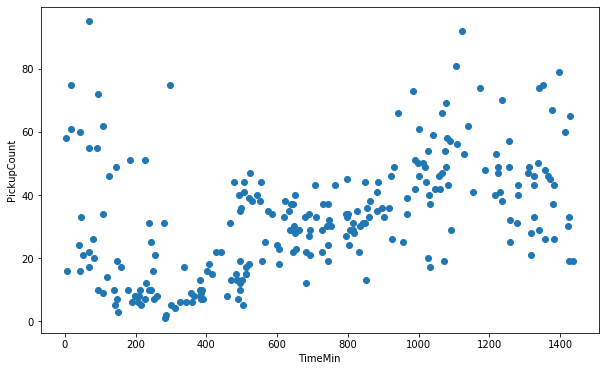

In [4]:
fig,ax=plt.subplots(1,1,figsize=(10,6))
plt.scatter(dftaxi.TimeMin, dftaxi.PickupCount)
plt.xlabel("TimeMin")
plt.ylabel("PickupCount")
plt.show()

### 1.1.2 [1 pt]:  Discuss your results

* Does the pattern of taxi pickups make intuitive sense to you?

   *Your answer here.*
   
   Answer:  Not very clear. I am used to the time said by 24-hour timing method, which is different from the data in "TimeMin". So once I read a number from the pattern, I have to trans the minutes into hours in my mind. 

## 1.2 [12 pts]: k-Nearest Neighbors

We begin with k-Nearest Neighbors (k-NN), a non-parametric regression technique. You may use `sklearn`'s built-in functions to run k-NN regression.

### 1.2.1 [6pts]
Fit a k-NN regression model to the training set for different values of $k$ (e.g. you may try out values 1, 2, 10, 25, 50, 100 and 200).

#### Deliverables
Your code should be contained in a Jupyter notebook cell.  An appropriate level of comments is necessary.  Your code should run and output the required outputs described below.
##### Hints:
* Normalize the `TimeMin` predictor to a value between $0$ and $1$. This can be done by dividing the time column in the training and test sets by $1440$ (i.e. the number of minutes in a day, which is the maximum value the predictor can take). Although not required for this homework, this normalization step would be particularly helpful while fitting polynomial regression models on this data.
* Sort the $x$ values before making your plots.

#### Required Outputs
* [2 pts] Make a scatter plot of `pickup counts` vs. `Time` for each $k$.  Each figure should have plots of the prediction from the k-NN regression and the actual values on the same figure.  Each figure must have appropriate axis labels, title, and legend.
* [1 pt] Report the $R^2$ score for the fitted models on both the training and test sets.
* [3 pts] Plot the training and test $R^2$ values as a function of $k$ on the same figure.  Again, the figure must have axis labels and a legend.

In [5]:
dftaxi['TimeMin'] = dftaxi['TimeMin'].apply(lambda x:x/1440)

In [6]:
xtrain=dftaxi.TimeMin.values
ytrain=dftaxi.PickupCount.values
Xtrain=xtrain.reshape(xtrain.shape[0], 1)

In [7]:
#import linear model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#create linear model
regression = LinearRegression()

#fit linear model
regression.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
regdict = {}
for k in [1, 2, 10, 25, 50, 100, 200]:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(Xtrain, ytrain)
    regdict[k] = knnreg

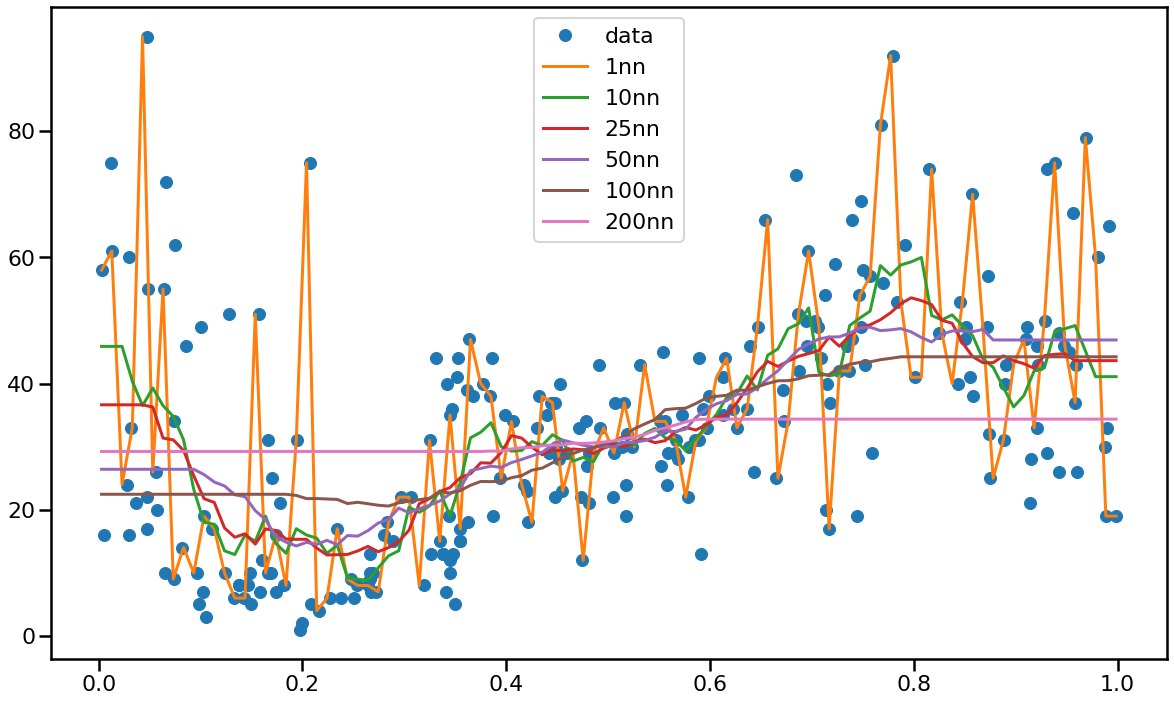

In [9]:
with sns.plotting_context('poster'):
    plt.subplots(1,1,figsize=(20,12))
    plt.plot(dftaxi.TimeMin, dftaxi.PickupCount, 'o', label="data",)
    xgrid = np.linspace(np.min(dftaxi.TimeMin), np.max(dftaxi.TimeMin), 100)
    for k in [1, 2, 10, 25, 50, 100, 200]:
        predictions = regdict[k].predict(xgrid.reshape(100,1))
        if k in [1, 10, 25, 50, 100, 200]:
            plt.plot(xgrid, predictions, label="{}nn".format(k))
    plt.legend();

### 1.2.2 [6 pts]:  Discuss your results
Discuss your results by answering the following questions.  You should answer the questions directly in this cell of your notebook right after each question.
1. [1 pt] How does the value of $k$ affect the fitted model?

  *Your answer here.*
2. [1 pt] If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?
  
  *Your answer here.*
  
3. [1 pt] Are some of the calculated $R^2$ values negative? If so, what does this indicate?

  *Your answer here.*
  
4. [1 pt] What does an $R^2$ score of $0$ mean?

  *Your answer here.*
  
5. [1 pt] Do the training and test $R^2$ plots exhibit different trends?  Describe.

  *Your answer here.*
  
6. [1 pt] Explain how the value of $k$ influences the training and test $R^2$ values.
*Your answer here.*

---

## 1.3 [11 pts]: Simple Linear Regression

We next consider parametric approaches for regression, starting with simple linear regression, which assumes that the response variable has a linear relationship with the predictor.

Use the `statsmodels` module for linear regression. This module has built-in functions to summarize the results of regression, and to compute confidence intervals for estimated regression parameters. Create a `OLS` class instance, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. To include an intercept term in the regression model, you will need to append a column of $1$s to the array of predictors using the `sm.add_constant` method. The `fit` method returns a `results` instance. Use the  `results.summary` method to obtain a summary of the regression fit, the `results.params` attribute to get the estimated regression parameters, and the `conf_int` method to compute confidence intervals for the estimated parameters. You may use the `r2_score` function to compute $R^2$.

### 1.3.1 [6 pts]:  Fit a linear regression model to the training set.

#### Deliverables
Your code should be contained in a Jupyter notebook cell.  An appropriate level of comments is necessary.  Your code should run and output the required outputs described below.

#### Required Outputs
* [1 pt] Report the $R^{2}$ score from the training and test sets.  You may notice something peculiar about how they compare.
* [1 pt] Report the slope and intercept values for the fitted linear model.
* [1 pt] Calculate and report the $95\%$ confidence interval for the slope and intercept.
* [3 pts] Plot the residuals $e = y - \hat{y}$ of the model on the training set as a function of the predictor variable $x$ (i.e. time of day). Draw a horizontal line denoting the zero residual value on the Y-axis.

### 1.3.2 [5 pts]: Discuss your results by answering the following questions.  
You should answer the questions directly in this cell of your notebook right after each question.
1. [1 pt] How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?

  *Your answer here.*
  
2. [1 pt] What does the sign of the slope of the fitted linear model convey about the data?
  
  *Your answer here.*
  
3. [1 pt] Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?

  *Your answer here.*
  
4. [1 pt] Do you expect a $99\%$ confidence interval for the slope and intercept to be tighter or looser than the $95\%$ confidence intervals? Briefly explain your answer.

  *Your answer here.*
  
5. [1 pt] Based on the residual plot that you made, discuss whether or not the assumption of linearity is valid for this data.

  *Your answer here.*

---

# Part 2 [21 pts]: Multilinear Regression
## Problem Description:Forecasting Bike Sharing Usage

In this part of the homework, we will focus on multiple linear regression.  The specific task is to build a regression model for a bike share system that can predict the total number of bike rentals in a given day based on attributes about the day. Such a demand forecasting model would be useful in planning the number of bikes that need to be available in the system on any given day and also in monitoring traffic in the city. The data for this problem was collected from the Capital Bikeshare program in Washington D.C. over two years.   

The data set is provided in the files `Bikeshare_train.csv` and `Bikeshare_test.csv`, as separate training and test sets. Each row in these files contains $10$ attributes describing a day and its weather:
- season (1 = spring, 2 = summer, 3 = fall, 4 = winter)
- month (1 through 12, with 1 denoting Jan)
- holiday (1 = the day is a holiday, 0 = otherwise)
- day_of_week (0 through 6, with 0 denoting Sunday)
- workingday (1 = the day is neither a holiday or weekend, 0 = otherwise)
- weather 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp (temperature in Celsius)
- atemp (apparent temperature, or relative outdoor temperature, in Celsius)
- humidity (relative humidity)
- windspeed (wind speed)

and the last column 'count' contains the response variable, i.e. total number of bike rentals for the day.

You will fit a linear regression model and analyze its coefficients and residuals.  

In [294]:
dfbike_train = pd.read_csv("Bikeshare_train.csv")
dfbike_train = dfbike_train.rename(columns={"count":"TotalCount"})
dfbike_train = dfbike_train.rename(columns={"Unnamed: 0":"Number"})
dfbike_train.head()

,Number,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,TotalCount
0,0,2.0,5.0,0.0,2.0,1.0,2.0,24.0,26.0,76.5833,0.118167,6073.0
1,1,4.0,12.0,0.0,2.0,1.0,1.0,15.0,19.0,73.3750,0.174129,6606.0
2,2,2.0,6.0,0.0,4.0,1.0,1.0,26.0,28.0,56.9583,0.253733,7363.0
3,3,4.0,12.0,0.0,0.0,0.0,1.0,0.0,4.0,58.6250,0.169779,2431.0
4,4,3.0,9.0,0.0,3.0,1.0,3.0,23.0,23.0,91.7083,0.097021,1996.0


In [295]:
dfweekday = dfbike_train[['TotalCount','day_of_week']][(dfbike_train.day_of_week>0)&(dfbike_train.day_of_week<6)]
dfweekend = dfbike_train[['TotalCount','day_of_week']][(dfbike_train.day_of_week==0)|(dfbike_train.day_of_week==6)]
dfweekday.describe()

,TotalCount,day_of_week
count,233.000000,233.000000
mean,4643.862661,2.896996
std,1842.210174,1.479061
min,431.000000,1.000000
25%,3669.000000,2.000000
50%,4634.000000,3.000000
75%,5918.000000,4.000000
max,8167.000000,5.000000


In [296]:
dfweekend.describe()

,TotalCount,day_of_week
count,98.000000,98.000000
mean,4490.469388,2.755102
std,2146.758857,3.005360
min,605.000000,0.000000
25%,2825.000000,0.000000
50%,4654.500000,0.000000
75%,6017.250000,6.000000
max,8714.000000,6.000000


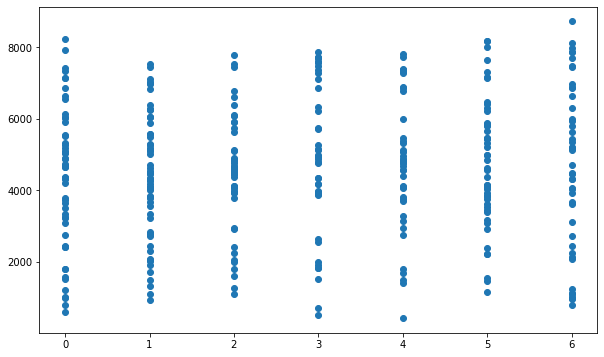

In [297]:
fig,ax=plt.subplots(1,1,figsize=(10,6))
plt.scatter(dfbike_train.day_of_week, dfbike_train.TotalCount)

In [298]:
dfbike_test = pd.read_csv("Bikeshare_test.csv")
dfbike_test.head(20)

,Unnamed: 0,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
0,0,1.0,2.0,0.0,4.0,1.0,1.0,2.0,6.0,56.2083,0.194037,3830.0
1,1,1.0,12.0,0.0,4.0,1.0,2.0,1.0,3.0,65.2917,0.350133,2114.0
2,2,2.0,6.0,0.0,4.0,1.0,2.0,36.0,37.0,56.8333,0.149883,915.0
3,3,1.0,2.0,0.0,1.0,1.0,1.0,8.0,12.0,49.0833,0.268033,4322.0
4,4,2.0,5.0,0.0,0.0,0.0,1.0,28.0,29.0,69.7083,0.215171,6591.0
5,5,3.0,8.0,0.0,2.0,1.0,1.0,25.0,26.0,54.8333,0.125008,5204.0
6,6,4.0,11.0,0.0,4.0,1.0,1.0,3.0,8.0,55.5652,0.115522,5323.0
7,7,3.0,9.0,1.0,1.0,0.0,2.0,27.0,28.0,79.0417,0.212696,3351.0
8,8,1.0,12.0,0.0,4.0,1.0,2.0,12.0,16.0,75.7500,0.047275,7258.0
9,9,2.0,6.0,0.0,2.0,1.0,2.0,26.0,27.0,83.3333,0.214546,4972.0


In [299]:
dfholiday = dfbike_train[(dfbike_train.holiday==1)]
dfholiday

,Number,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,TotalCount
22,22,1.0,12.0,1.0,1.0,0.0,1.0,5.0,9.0,50.6957,0.239465,1317.0
28,28,3.0,9.0,1.0,1.0,0.0,1.0,30.0,31.0,79.0833,0.151121,6034.0
35,35,3.0,7.0,1.0,1.0,0.0,2.0,31.0,31.0,63.7917,0.081479,6043.0
77,77,1.0,1.0,1.0,1.0,0.0,1.0,-3.0,1.0,52.2500,0.231358,2298.0
87,87,1.0,2.0,1.0,1.0,0.0,2.0,4.0,7.0,60.5000,0.307846,1107.0
204,204,4.0,11.0,1.0,4.0,0.0,1.0,9.0,12.0,54.9167,0.167304,1495.0
231,231,4.0,11.0,1.0,1.0,0.0,1.0,16.0,19.0,74.1667,0.173517,6269.0
236,236,2.0,5.0,1.0,1.0,0.0,1.0,31.0,31.0,68.5000,0.131225,4098.0
268,268,4.0,10.0,1.0,1.0,0.0,1.0,21.0,23.0,73.3750,0.042304,5117.0
269,269,2.0,4.0,1.0,1.0,0.0,1.0,27.0,28.0,56.1667,0.284829,6370.0


## 2.1 [2 pts]: Exploratory Data Analysis (EDA)

As a first step, identify important characteristics of the data using suitable visualizations when necessary. Some of the questions you may ask include (but are not limited to):

- How does the number of bike rentals vary between weekdays and weekends? 
- How about bike rentals on holidays?
- What effect does the season have on the bike rentals on a given day?
- Is the number of bike rentals lower than average when there is rain or snow?
- How does temperature effect bike rentals?
- Do any of the numeric attributes have a clear non-linear dependence with number of the bike rentals?

**Note:  You are not required to answer all of the suggested questions.  You should answer *at least* three of them.  You are also encouraged to formulate and answer your own questions.  This part is deliberately open-ended to force you to think about data in the right way.**

## 2.2 [8 pts]:  Pre-process the categorical and numerical attributes in the data set
This data set contains categorical attributes with two or more categories.

### 2.2.1 [5 pts]:  Convert categorical attributes into multiple binary attributes.

#### Deliverables
Your code should be contained in a Jupyter notebook cell.  An appropriate level of comments is necessary.  Your code should run and output the required outputs described below.

#### Required outputs
- [2 pts] Convert these categorical attributes into multiple binary attributes using one-hot encoding.
  * In place of every categorical attribute $x_j$ that has categories $1, \ldots, K_j$, introduce $K_j-1$ binary predictors $x_{j1}, \ldots, x_{j,K_j-1}$ where $x_{jk}$ is $1$ whenever $x_j = k$ and $0$ otherwise.
  * *Hint:* You may use the `pd.get_dummies` function to convert a categorical attribute in a data frame to one-hot encoding. This function creates $K$ binary columns for an attribute with $K$ categories. You should delete the last binary column generated by this function.
- [2 pts] Scale each continuous predictor to have zero mean and a standard deviation of $1$.
  * This can be done by applying the following transform to each continuous-valued predictor $j$:
    $$\hat{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j}$$ where $\bar{x}_j$ and $s_j$ are the sample mean and sample standard deviation (SD) of predictor $j$ in the training set.
  * **Note:**  The reason for re-scaling is because the attributes are in different scales.
  * **We emphasize that the mean and SD values used for standardization must be estimated using only the training set observations, while the transform is applied to both the training and test sets.**
- [1 pt] Provide a table of the summary statistics of the new attributes (the `pd.describe` function will help).

**Note:** We use the term "attribute" to refer to a categorical column in the data set, and the term "predictor" to refer to the individual binary columns resulting out of one-hot encoding.

In [300]:
#season
season = pd.get_dummies(dfbike_train['season']) 
season = season.rename(columns={1.0:"Spring"})
season = season.rename(columns={2.0:"Summer"})
season = season.rename(columns={3.0:"Fall"})
season = season.rename(columns={4.0:"Winter"})
#trans to string
season['Spring'] = season['Spring'].map(lambda x:str(x))
season['Summer'] = season['Summer'].map(lambda x:str(x))
season['Fall'] = season['Fall'].map(lambda x:str(x))
season['Winter'] = season['Winter'].map(lambda x:str(x))
#combine
Season = season['Spring'].str.cat(season['Summer'])
Season = Season.str.cat(season['Fall'])
Season = Season.str.cat(season['Winter'])
dfbike_train.season = Season

In [301]:
#month
month = pd.get_dummies(dfbike_train.month)
month = month.rename(columns={1.0:"Jan"})
month = month.rename(columns={2.0:"Feb"})
month = month.rename(columns={3.0:"Mar"})
month = month.rename(columns={4.0:"Apr"})
month = month.rename(columns={5.0:"May"})
month = month.rename(columns={6.0:"Jun"})
month = month.rename(columns={7.0:"Jul"})
month = month.rename(columns={8.0:"Aug"})
month = month.rename(columns={9.0:"Sep"})
month = month.rename(columns={10.0:"Oct"})
month = month.rename(columns={11.0:"Nov"})
month = month.rename(columns={12.0:"Dec"})
#trans to string
month['Jan'] = month['Jan'].map(lambda x:str(x))
month['Feb'] = month['Feb'].map(lambda x:str(x))
month['Mar'] = month['Mar'].map(lambda x:str(x))
month['Apr'] = month['Apr'].map(lambda x:str(x))
month['May'] = month['May'].map(lambda x:str(x))
month['Jun'] = month['Jun'].map(lambda x:str(x))
month['Jul'] = month['Jul'].map(lambda x:str(x))
month['Aug'] = month['Aug'].map(lambda x:str(x))
month['Sep'] = month['Sep'].map(lambda x:str(x))
month['Oct'] = month['Oct'].map(lambda x:str(x))
month['Nov'] = month['Nov'].map(lambda x:str(x))
month['Dec'] = month['Dec'].map(lambda x:str(x))
#combine
Month = month['Jan'].str.cat(month['Feb'])
Month = Month.str.cat(month['Mar'])
Month = Month.str.cat(month['Apr'])
Month = Month.str.cat(month['May'])
Month = Month.str.cat(month['Jun'])
Month = Month.str.cat(month['Jul'])
Month = Month.str.cat(month['Aug'])
Month = Month.str.cat(month['Sep'])
Month = Month.str.cat(month['Oct'])
Month = Month.str.cat(month['Nov'])
Month = Month.str.cat(month['Dec'])
dfbike_train.month = Month

In [302]:
#holiday
holiday = pd.get_dummies(dfbike_train.holiday) 
#trans
holiday[0.0] = holiday[0.0].map(lambda x:str(x))
holiday[1.0] = holiday[1.0].map(lambda x:str(x))
#Combine
Holiday = holiday[0.0].str.cat(holiday[1.0])
dfbike_train.holiday = Holiday

In [303]:
#day_of_week
week = pd.get_dummies(dfbike_train.day_of_week)
week = week.rename(columns={0.0:"Sun"})
week = week.rename(columns={1.0:"Mon"})
week = week.rename(columns={2.0:"Tue"})
week = week.rename(columns={3.0:"Wed"})
week = week.rename(columns={4.0:"Thu"})
week = week.rename(columns={5.0:"Fri"})
week = week.rename(columns={6.0:"Sat"})
#trans
week['Mon'] = week['Mon'].map(lambda x:str(x))
week['Tue'] = week['Tue'].map(lambda x:str(x))
week['Wed'] = week['Wed'].map(lambda x:str(x))
week['Thu'] = week['Thu'].map(lambda x:str(x))
week['Fri'] = week['Fri'].map(lambda x:str(x))
week['Sat'] = week['Sat'].map(lambda x:str(x))
week['Sun'] = week['Sun'].map(lambda x:str(x))
#Combine
Week = week['Sun'].str.cat(week['Mon'])
Week = Week.str.cat(week['Tue'])
Week = Week.str.cat(week['Wed'])
Week = Week.str.cat(week['Thu'])
Week = Week.str.cat(week['Fri'])
Week = Week.str.cat(week['Sat'])
dfbike_train.day_of_week = Week

In [304]:
#workingday
workingday = pd.get_dummies(dfbike_train.workingday) 
#trans
workingday[0.0] = workingday[0.0].map(lambda x:str(x))
workingday[1.0] = workingday[1.0].map(lambda x:str(x))
#Combine
Workingday = workingday[0.0].str.cat(workingday[1.0])
dfbike_train.workingday = Workingday

In [305]:
#weather
weather = pd.get_dummies(dfbike_train.weather)
weather[4.0] = 0
#trans
weather[1.0] = weather[1.0].map(lambda x:str(x))
weather[2.0] = weather[2.0].map(lambda x:str(x))
weather[3.0] = weather[3.0].map(lambda x:str(x))
weather[4.0] = weather[4.0].map(lambda x:str(x))
#Combine
Weather = weather[1.0].str.cat(weather[2.0])
Weather = Weather.str.cat(weather[3.0])
Weather = Weather.str.cat(weather[4.0])
dfbike_train.weather = Weather

In [306]:
#Normal
def normalize_function(the_col):
    mean = the_col.mean()
    std = the_col.std()
    the_col = the_col.apply(lambda x: (x-mean)/std)
    return the_col

In [307]:
dfbike_train.temp = normalize_function(dfbike_train.temp)
dfbike_train.atemp = normalize_function(dfbike_train.atemp)
dfbike_train.humidity = normalize_function(dfbike_train.humidity)
dfbike_train.windspeed = normalize_function(dfbike_train.windspeed)

In [308]:
dfbike_train

,Number,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,TotalCount
0,0,0100,000010000000,10,0010000,01,0100,0.623798,0.650106,0.920664,-0.928758,6073.0
1,1,0001,000000000001,10,0010000,01,1000,-0.180310,-0.054759,0.696852,-0.213502,6606.0
2,2,0100,000001000000,10,0000100,01,1000,0.802489,0.851495,-0.448383,0.803926,7363.0
3,3,0001,000000000001,10,1000000,10,1000,-1.520492,-1.565182,-0.332113,-0.269099,2431.0
4,4,0010,000000001000,10,0001000,01,0010,0.534453,0.348021,1.975789,-1.199027,1996.0
5,5,0100,000010000000,10,0010000,01,0100,0.623798,0.650106,0.441062,1.940601,4451.0
6,6,0001,000000000010,10,0000100,01,1000,-0.895074,-0.860318,-2.095460,2.006654,5315.0
7,7,0100,000001000000,10,0010000,01,1000,0.534453,0.650106,-0.884385,1.002672,4891.0
8,8,0010,000000001000,10,0000001,10,1000,0.534453,0.650106,-0.922167,0.724530,8714.0
9,9,0010,000000010000,10,0001000,01,1000,1.159871,1.052885,-0.099581,-0.269202,7347.0


### 2.2.2 [3 pts]: Discussion questions
1. [1 pt] Why can't the categorical attributes be directly used as predictors?

  *Your answer here.*
  
2. [1 pt] Why is it okay to not have a binary column for the $K_j$-th category?

  *Your answer here.*
  
3. [1 pt] Why shouldn't we include the test set observations in computing the mean and SD?

  *Your answer here.*
  

## 2.3 [11 pts] :  Fit a multiple linear regression model

### 2.3.1 [5 pts]:  Fit a multiple linear regression model to the training set.
Use the `statsmodels` library.

#### Deliverables
Your code should be contained in a Jupyter notebook cell.  An appropriate level of comments is necessary.  Your code should run and output the required outputs described below.

#### Required Outputs
- [1 pt] Report the $R^2$ score on the test set.
  - *Note:  Don't worry if the $R^{2}$ score is not very good.*
- [2 pts] Find out which of the estimated coefficients are statistically significant at a significance level of $5\%$ ($p$-value $<0.05$).
  - **Hint:  Use a $t-$ test.**
- [2 pts] Make a plot of residuals of the fitted model ${e} = y - \hat{y}$ as a function of the predicted value $\hat{y}$. Draw a horizontal line denoting the zero residual value on the $Y$-axis.

### 2.3.2 [6 pts]: Discuss your results by answering the following questions.  
You should answer the questions directly in this cell of your notebook right after each question.

1. [1 pt] Which among the predictors have a positive correlation with the number of bike rentals?

  *Your answer here.*
  
2. [1 pt] Does the day of week have a relationship with bike rentals?

  *Your answer here.*
  
3. [1 pt] What effect does a holiday have on bike rentals?

  *Your answer here.*
  
4. [1 pt] Is there a difference in the coefficients assigned to `temp` and `atemp`? Give an explanation for your observation.

  *Your answer here.*
  
5. [1 pt] Does the plot of $e$ reveal a non-linear relationship between the predictors and response?

  *Your answer here.*
  
6. [1 pt] What does the plot of $e$ convey about the variance of the error terms?

  *Your answer here.*
  